In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [44]:
stock = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/VNI.csv', parse_dates=['Date'], index_col=0)
VNItest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VNI.csv',
                        parse_dates=['Date'], index_col='Date')
stock.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-12-31,"1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
2021-12-30,"1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2021-12-29,"1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
2021-12-28,"1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
2021-12-27,"1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%


In [45]:
stock.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [46]:
stock["Price"] = pd.to_numeric(stock["Price"].apply(lambda x: x.replace(",", "")))
stock = stock.iloc[::-1]

VNItest["Price"] = pd.to_numeric(VNItest["Price"].apply(lambda x: x.replace(",", "")))
VNItest = VNItest.iloc[::-1]

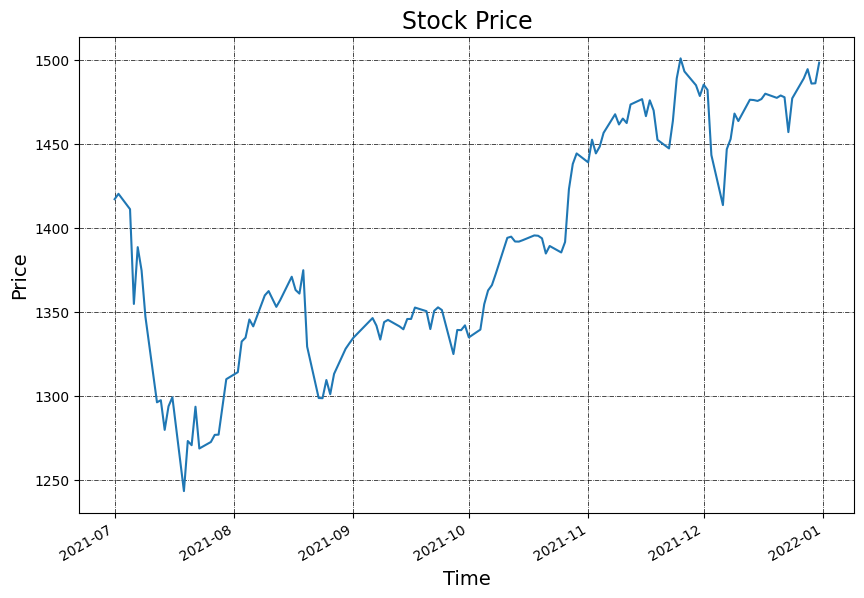

In [47]:
stock['Price'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

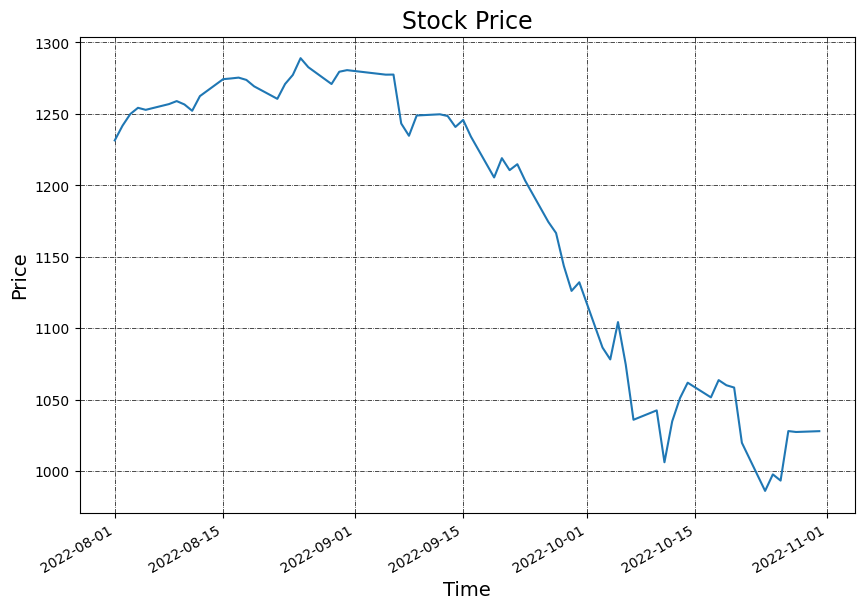

In [48]:
VNItest['Price'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [49]:
df = pd.DataFrame(stock, columns=['Price'])
df = df.reset_index()
df.head()

,Date,Price
0,2021-07-01,1417.08
1,2021-07-02,1420.27
2,2021-07-05,1411.13
3,2021-07-06,1354.79
4,2021-07-07,1388.55


In [50]:
test = pd.DataFrame(VNItest, columns=['Price'])
test = test.reset_index()
test.head()

,Date,Price
0,2022-08-01,1231.35
1,2022-08-02,1241.62
2,2022-08-03,1249.76
3,2022-08-04,1254.15
4,2022-08-05,1252.74


In [51]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100)
X_train = np.array(df.index).reshape(-1, 1)
y_train = df['Price']
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

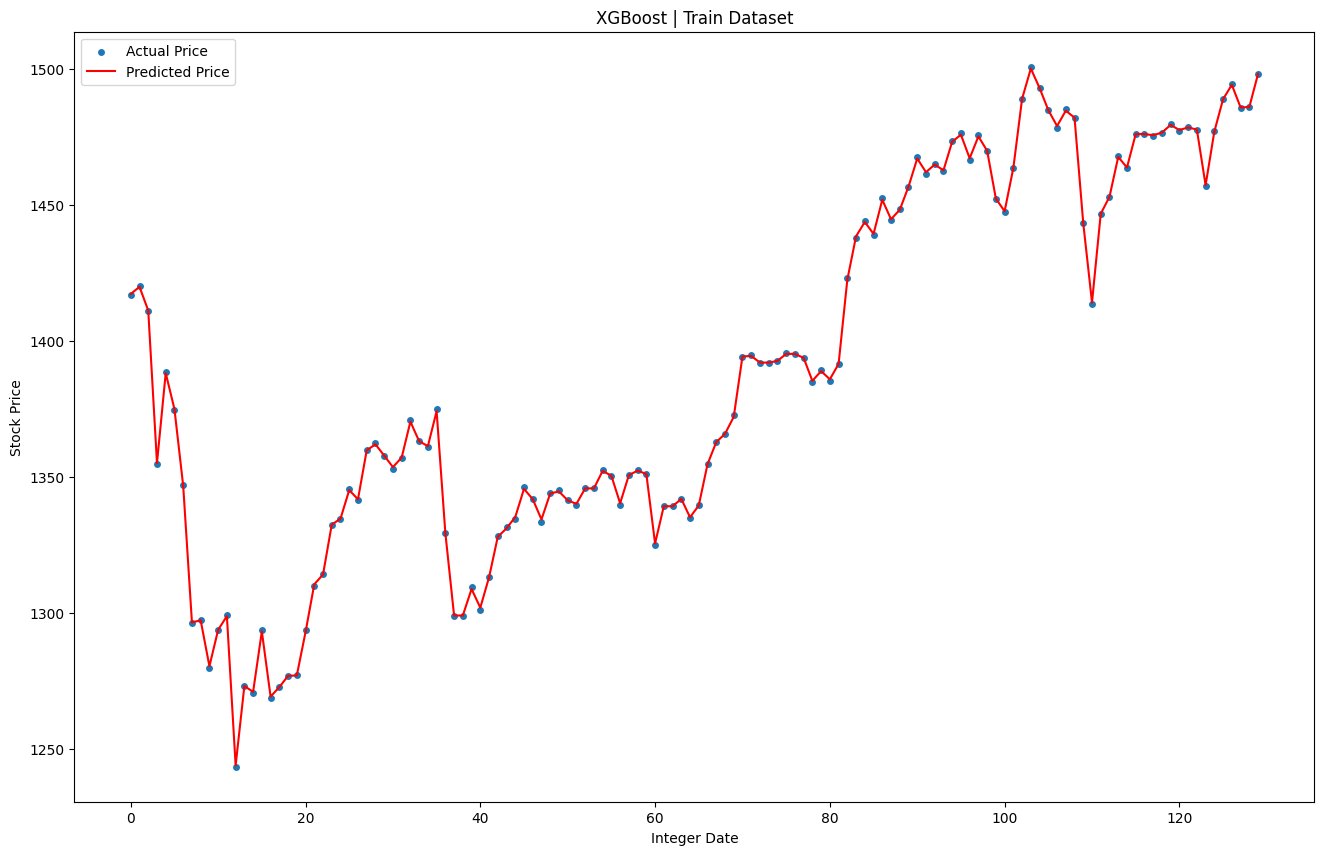

In [52]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('XGBoost | Train Dataset')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [53]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Price']
# Generate array with predicted values
y_pred = model.predict(X_test)

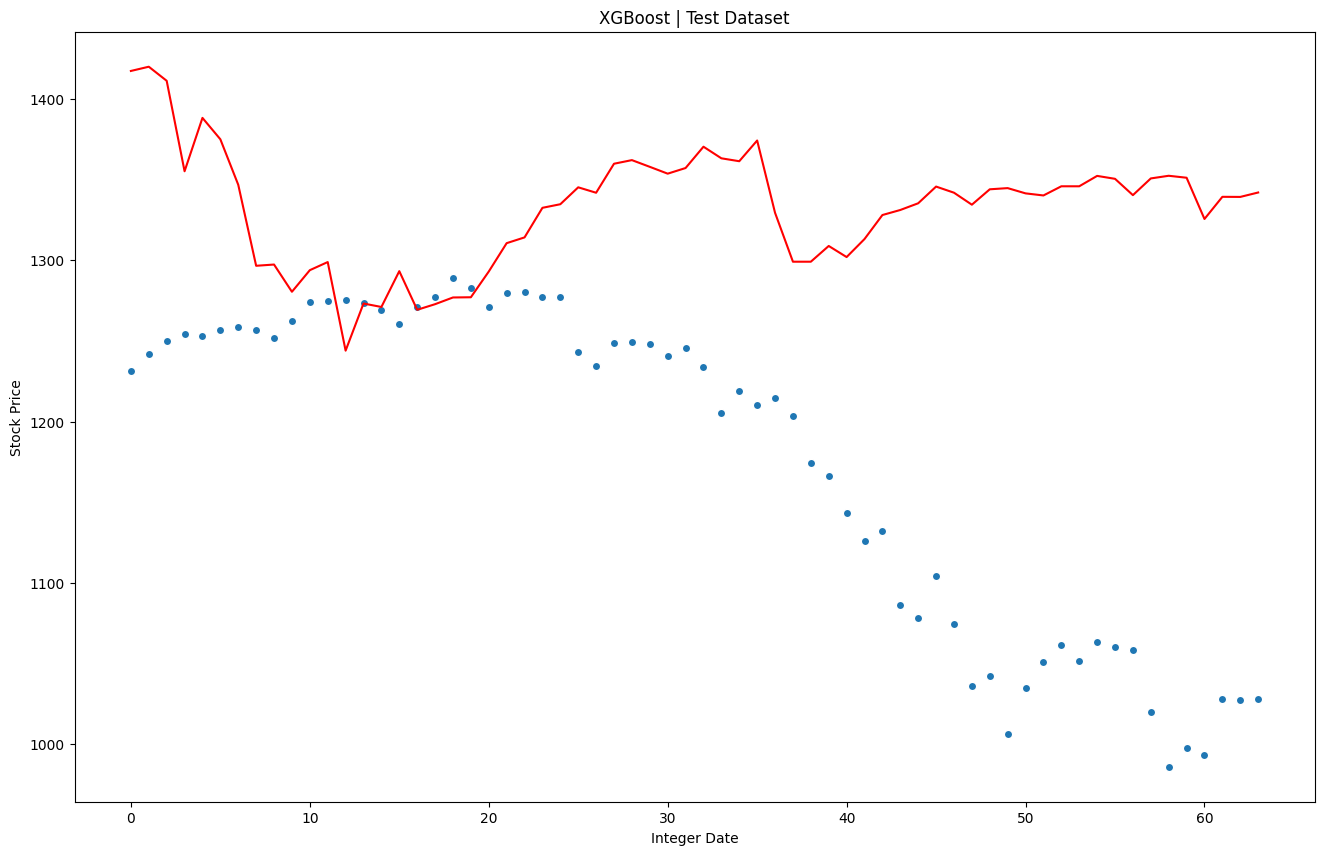

In [54]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('XGBoost | Test Dataset')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.show()

In [55]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
df

,Date,Price,Prediction
0,2021-07-01,1417.08,1417.282104
1,2021-07-02,1420.27,1419.907104
2,2021-07-05,1411.13,1411.187866
3,2021-07-06,1354.79,1355.128052
4,2021-07-07,1388.55,1388.203979
...,...,...,...
125,2021-12-27,1488.88,1488.880615
126,2021-12-28,1494.39,1494.167480
127,2021-12-29,1485.82,1485.871582
128,2021-12-30,1485.97,1485.973511


In [56]:
test['Prediction'] = model.predict(np.array(test.index).reshape(-1, 1))
test

,Date,Price,Prediction
0,2022-08-01,1231.35,1417.282104
1,2022-08-02,1241.62,1419.907104
2,2022-08-03,1249.76,1411.187866
3,2022-08-04,1254.15,1355.128052
4,2022-08-05,1252.74,1388.203979
...,...,...,...
59,2022-10-25,997.70,1351.116089
60,2022-10-26,993.36,1325.558838
61,2022-10-27,1028.01,1339.292236
62,2022-10-28,1027.36,1339.229980


In [57]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
# Statistical summary of test data
df['Price'].describe()

count     130.000000
mean     1388.673615
std        68.784144
min      1243.510000
25%      1339.580000
50%      1374.765000
75%      1460.365000
max      1500.810000
Name: Price, dtype: float64

In [58]:
# Calculate and print values of MAE, MSE, RMSE, R2
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 157.71547920227053
Mean Squared Error: 37557.50436139194
Root Mean Squared Error: 193.7975860566688
R2:  -2.6992681910134064


Another XGB Model

In [59]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=4)
X_train = np.array(df.index).reshape(-1, 1)
y_train = df['Price']
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

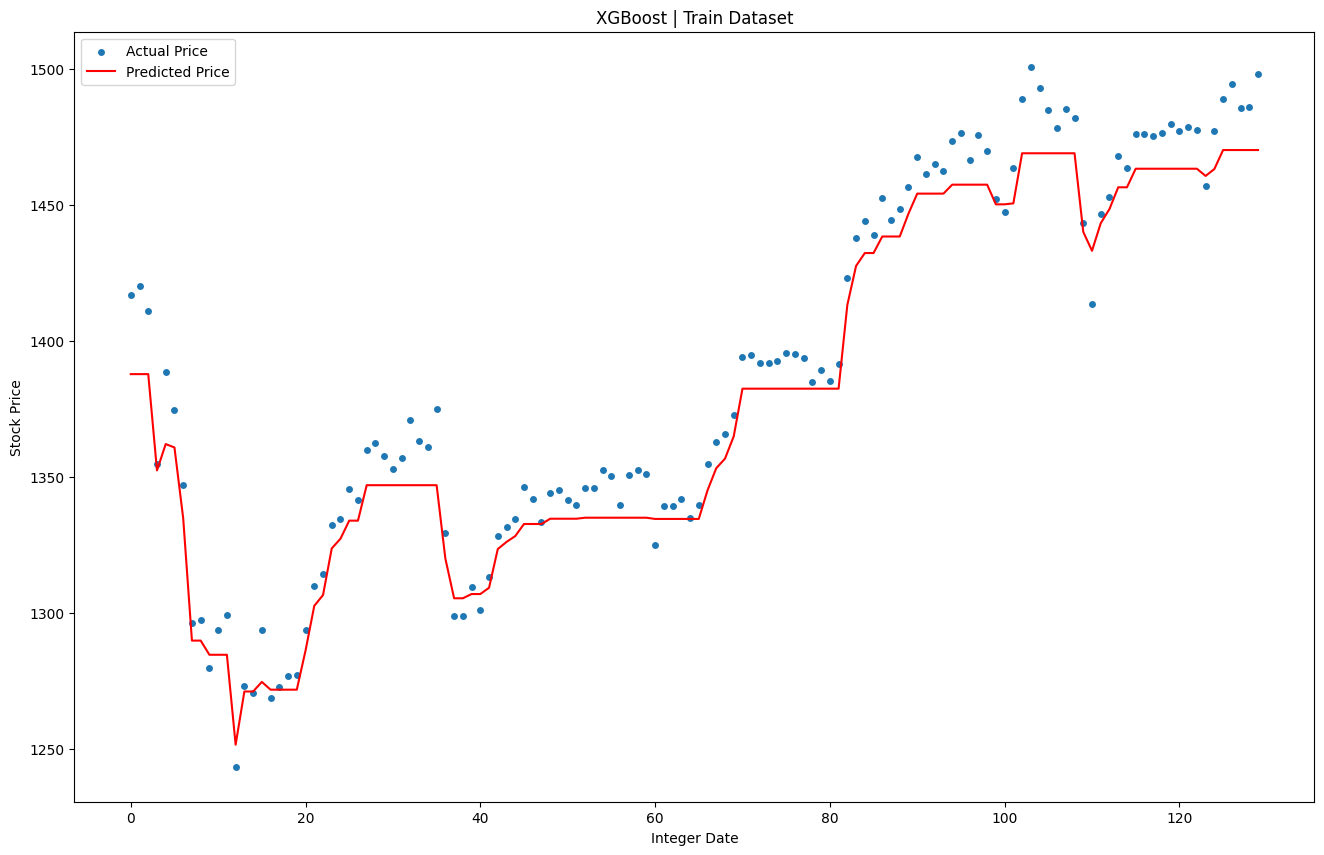

In [60]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('XGBoost | Train Dataset')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

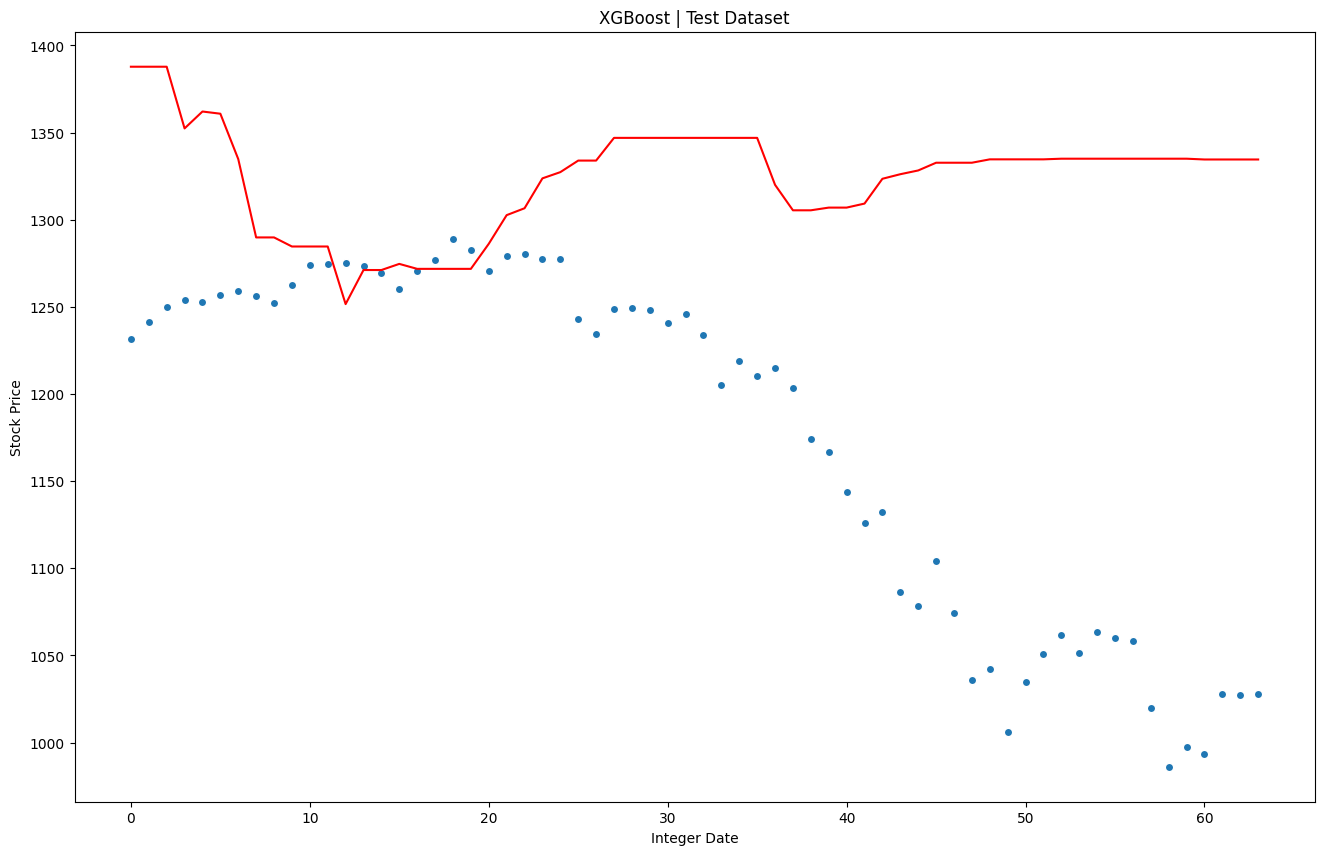

In [61]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('XGBoost | Test Dataset')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.show()